In [ ]:

                        Temperature Forecast Project using ML
Project Description:
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:
    

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

In [62]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [63]:
tempdf=pd.read_csv('Temperature.csv')

In [64]:
tempdf


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [5]:
# checking for the number of tuples and feature(7752 tuples and 25 feature)
tempdf.shape

(7752, 25)

In [6]:
#Here we have checked the all the tuples entries  are in correct sequence (RangeIndex: 7752 entries, 0 to 7751)
#Date feature is in object Type so we need to convert it into DateTime format
tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [7]:
# checking for the data types of the feature
tempdf.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [65]:
# We observed that Date feature is in object type so we need to convert it into datetime format
tempdf['Date']=pd.to_datetime(tempdf['Date'])

In [10]:
tempdf.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In [11]:
# checked for duplicate value as we have seen that duplicate values are not present in the feature 
tempdf.duplicated().sum()

0

In [13]:
tempdf.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<Axes: >

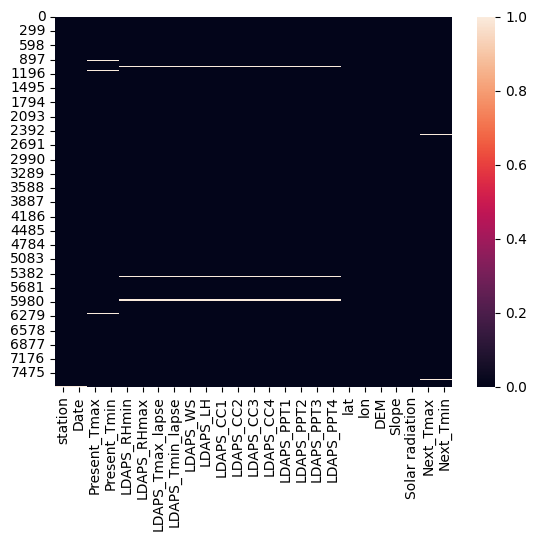

In [14]:
sns.heatmap(tempdf.isnull())

In [ ]:
#Here from the above heat map it is clear that missing values are present .

In [66]:
#Dropping null values 
tempdf=tempdf.dropna()

In [67]:
tempdf.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<Axes: >

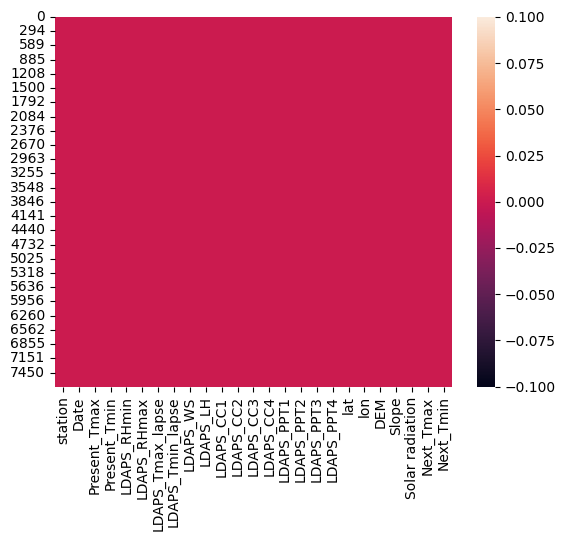

In [17]:
# After dropping nan values again checking for missing values using heat map to just confirm
sns.heatmap(tempdf.isnull())

In [ ]:
# Here it is clear that now missing values has been removed because we have seen the same color coding scheme in heat map indicate that missing values are not present

In [18]:
tempdf


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [19]:
tempdf.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,2015-07-27 18:22:12.208750592,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
min,1.000000,2013-06-30 00:00:00,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,2014-07-15 00:00:00,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,2015-07-29 00:00:00,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,2016-08-14 00:00:00,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,2017-08-30 00:00:00,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000
std,7.217858,NaN,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256


In [ ]:
# Key Observation: statistical summary of data
# count of each feature is different as missing values are present in the feature
# mean and median of the feature station ,Present_Tmax are almost same it means data distribution is normal and shape is in the form of bell curve  
# mean is less than median in LDAPS_RHmax it means negative skewness is present in the feature 
# mean is greater than median means positive skewness is present in the feature 
# slight jump from 3rd quratile range to max it means outliers are present in feature and this info we got from the abpve statistical summary

In [20]:
#checking for unique value in each feature 
tempdf.nunique()

station               25
Date                 307
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7585
LDAPS_RHmax         7577
LDAPS_Tmax_lapse    7588
LDAPS_Tmin_lapse    7588
LDAPS_WS            7588
LDAPS_LH            7588
LDAPS_CC1           7485
LDAPS_CC2           7496
LDAPS_CC3           7512
LDAPS_CC4           7438
LDAPS_PPT1          2779
LDAPS_PPT2          2479
LDAPS_PPT3          2326
LDAPS_PPT4          1892
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            181
Next_Tmin            157
dtype: int64

In [ ]:
# checking count of the occurence of the value in each feature 

In [21]:
for col in tempdf:
    print(tempdf[col].value_counts())

station
25.0    307
10.0    307
23.0    307
18.0    307
17.0    307
2.0     307
3.0     306
4.0     306
13.0    305
16.0    304
20.0    304
21.0    304
14.0    303
1.0     303
9.0     302
12.0    302
15.0    302
19.0    302
22.0    302
24.0    302
11.0    301
7.0     301
6.0     301
8.0     300
5.0     296
Name: count, dtype: int64
Date
2013-06-30    25
2016-07-23    25
2015-08-22    25
2015-08-23    25
2015-08-24    25
              ..
2015-08-13    22
2015-07-24    22
2017-07-06    22
2017-08-23    22
2017-06-30    16
Name: count, Length: 307, dtype: int64
Present_Tmax
31.4    112
29.4    108
29.1    106
29.2    105
30.6    105
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: count, Length: 167, dtype: int64
Present_Tmin
24.0    160
23.8    153
23.5    143
23.1    143
23.3    140
       ... 
14.3      1
29.9      1
29.7      1
29.1      1
15.0      1
Name: count, Length: 155, dtype: int64
LDAPS_RHmin
77.030350    2
51.810596    2
71.658089    2
58.255688 

In [68]:
tempdf.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [ ]:
# now we have handled all the missing values in the feature using mean()

In [ ]:
                    EXPLORATORY  DATA ANALYSIS

In [69]:
correlation =tempdf.corr()

<Axes: >

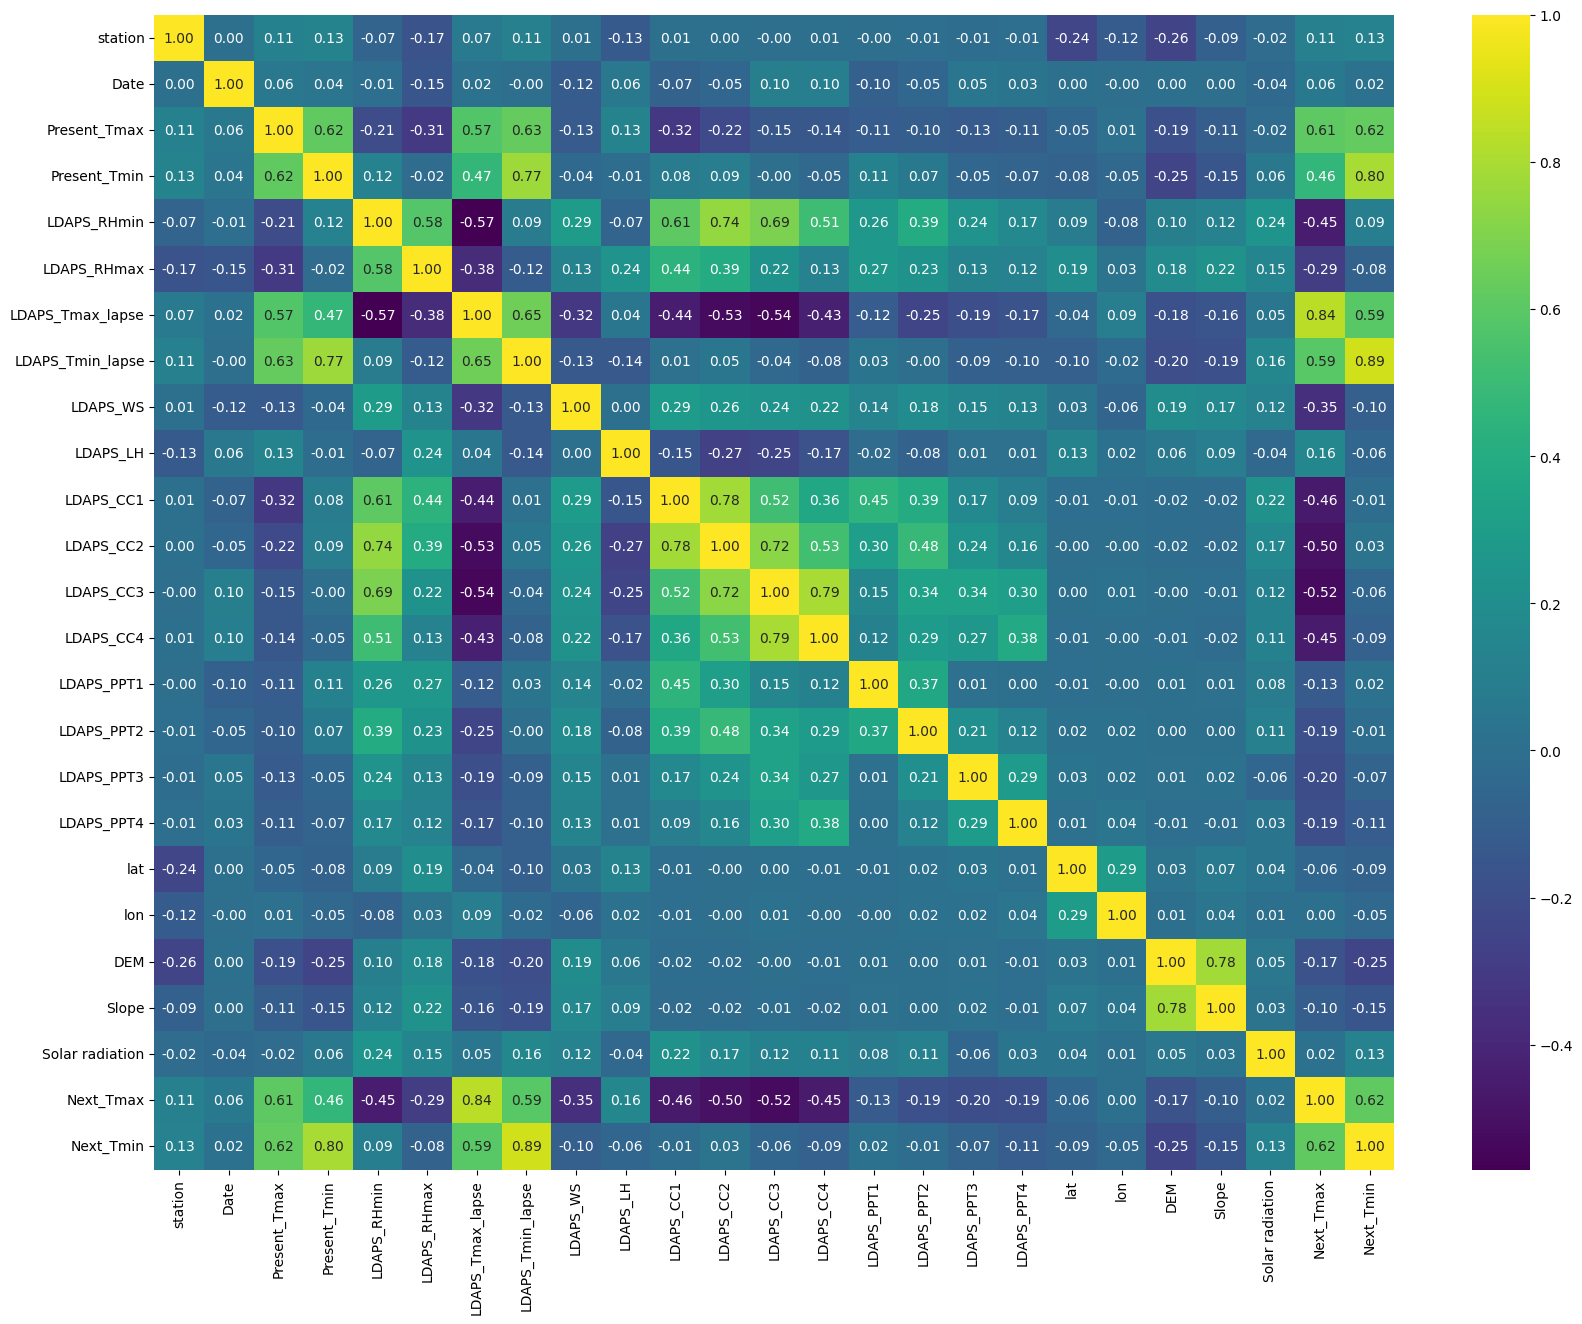

In [70]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation,annot=True,cmap='viridis',fmt='.2f')

In [ ]:
#Here from the above correlation matrix we observed that the Target variable (Next_Tmax and Next_Tmin) are  highly correlated with Present_Tmax and Present_Tmin
#Target variable are negatively correlated with most of the feature 
#LDAPS_Tmax_lapse and LDAPS_Tmin_lapse are highly positive correlated with target feature 
#LDAPS_CC1,LDAPS_CC2,LDAPS_CC3 are moderately correalted with each other 

In [25]:
#tempdf.drop(['LDAPS_CC2','LDAPS_CC3'],axis=1,inplace=True)

In [26]:
tempdf

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [27]:
tempdf.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2',
       'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

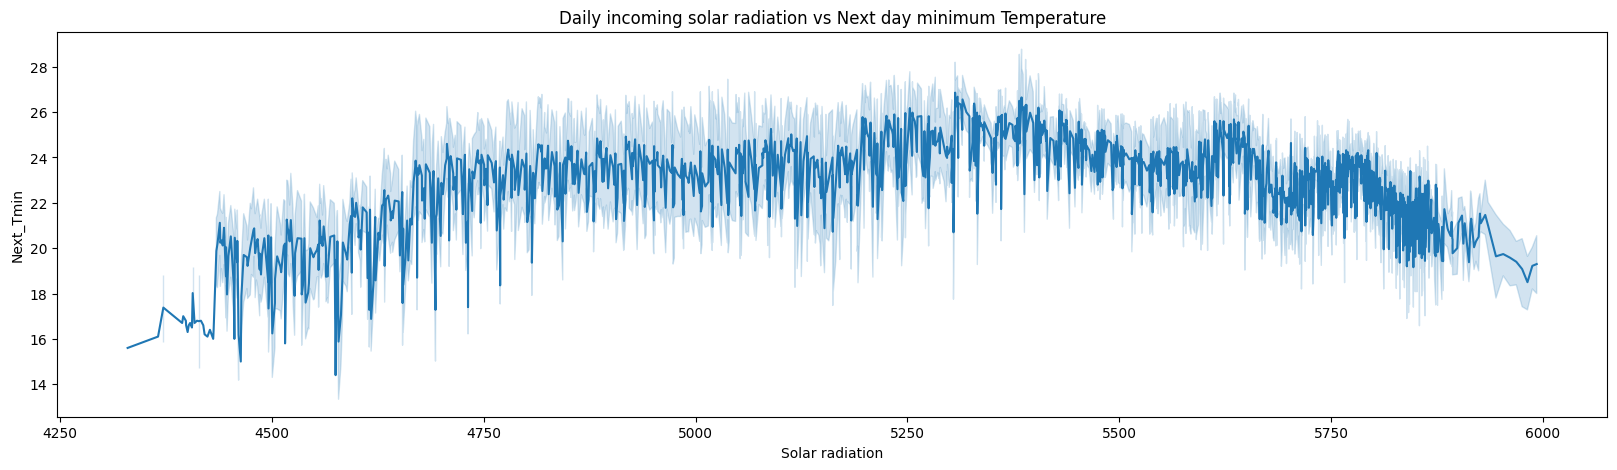

In [28]:
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day minimum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmin',data=tempdf)
plt.show()

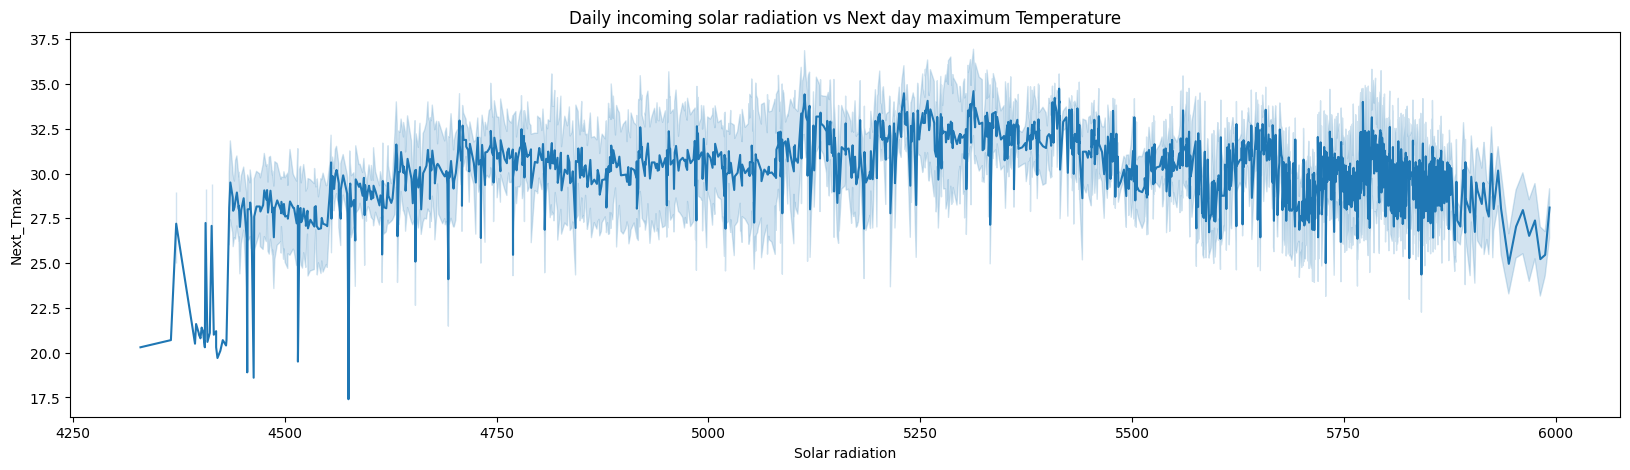

In [66]:
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day maximum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=tempdf)
plt.show()

In [ ]:
# Here from the above line plot we observed that Next_Tmax(next day maximum tempreature is increasing frequently)

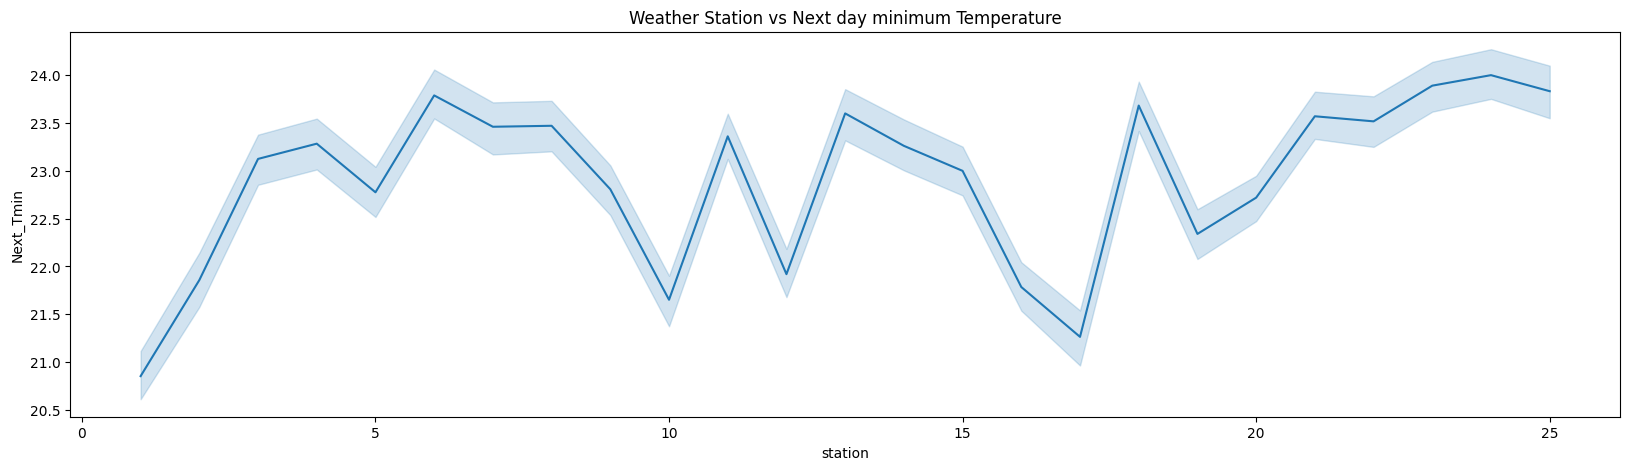

In [67]:
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day minimum Temperature')
sns.lineplot(x='station',y='Next_Tmin',data=tempdf)
plt.show()

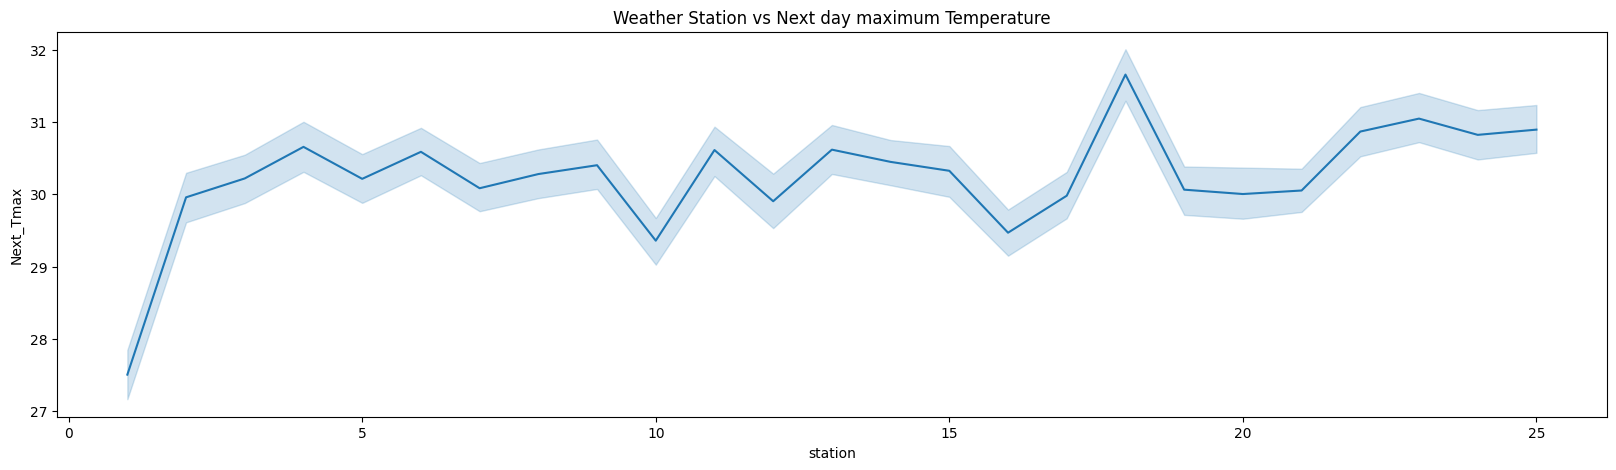

In [68]:
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day maximum Temperature')
sns.lineplot(x='station',y='Next_Tmax',data=tempdf)
plt.show()

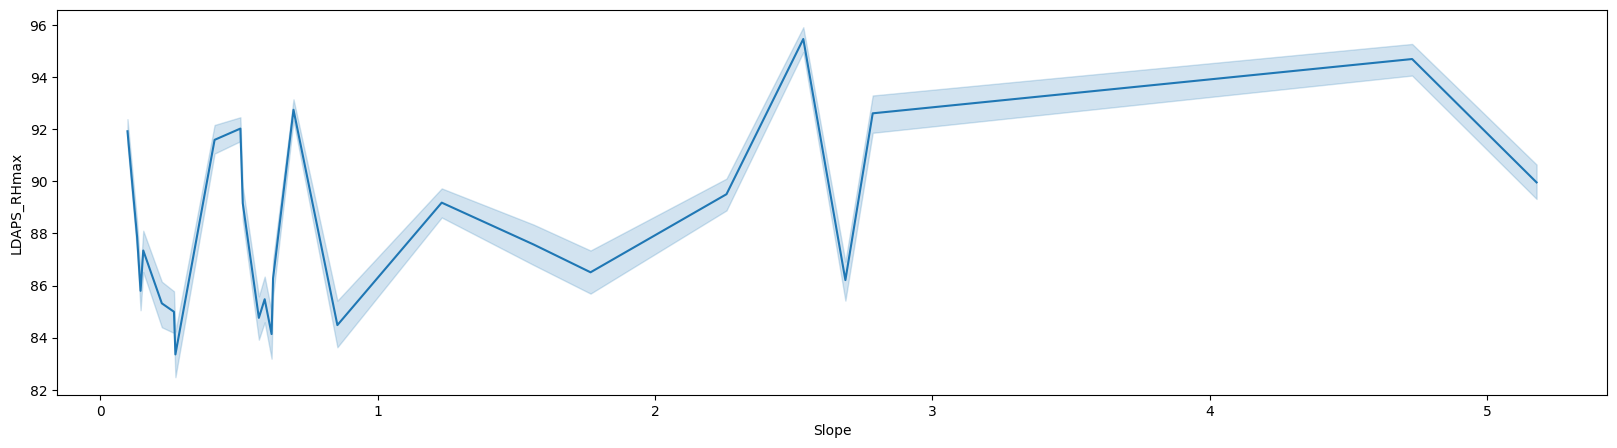

In [27]:
plt.figure(figsize=(20,5))
sns.lineplot(y='LDAPS_RHmax',x='Slope',data=tempdf)
plt.show()

Text(0, 0.5, 'Next_Tmax')

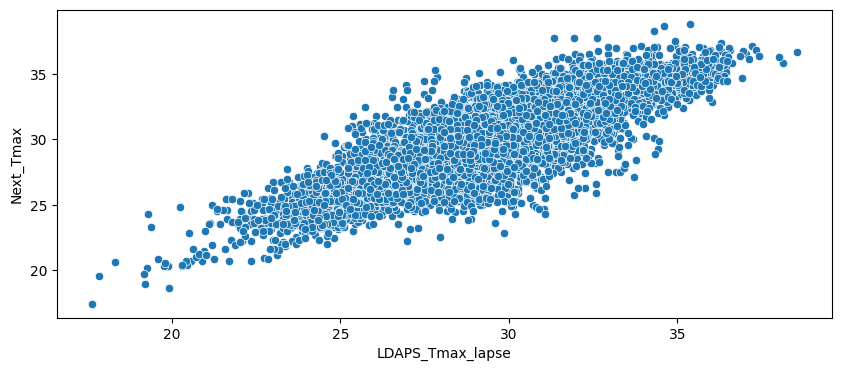

In [70]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=tempdf['LDAPS_Tmax_lapse'], y=tempdf['Next_Tmax'])
plt.xlabel('LDAPS_Tmax_lapse')
plt.ylabel('Next_Tmax')


Text(0, 0.5, 'Next_Tmin')

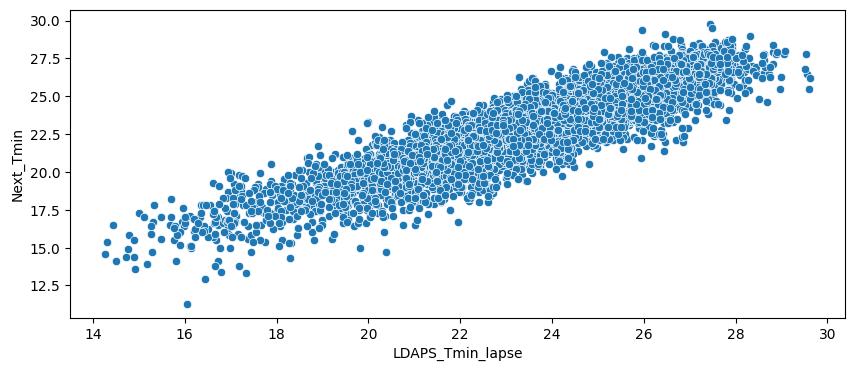

In [72]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=tempdf['LDAPS_Tmin_lapse'], y=tempdf['Next_Tmin'])
plt.xlabel('LDAPS_Tmin_lapse')
plt.ylabel('Next_Tmin')


Text(0, 0.5, 'Next_Tmin')

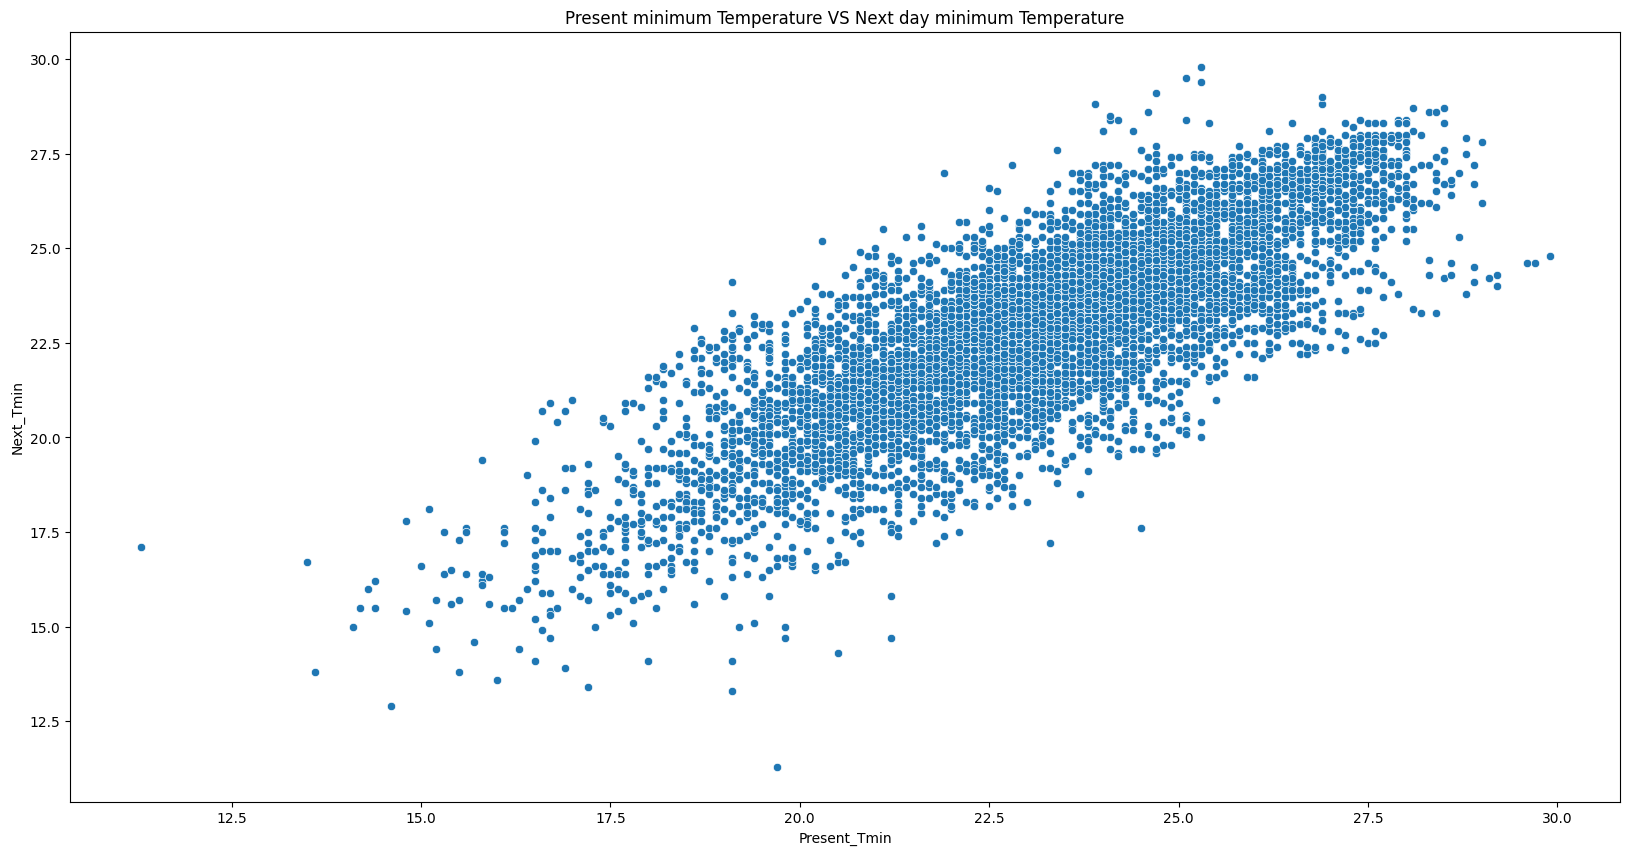

In [74]:

plt.figure(figsize=(20,10))
plt.title('Present minimum Temperature VS Next day minimum Temperature')
sns.scatterplot(x=tempdf['Present_Tmin'], y=tempdf['Next_Tmin'])
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmin')

Text(0, 0.5, 'Next_Tmax')

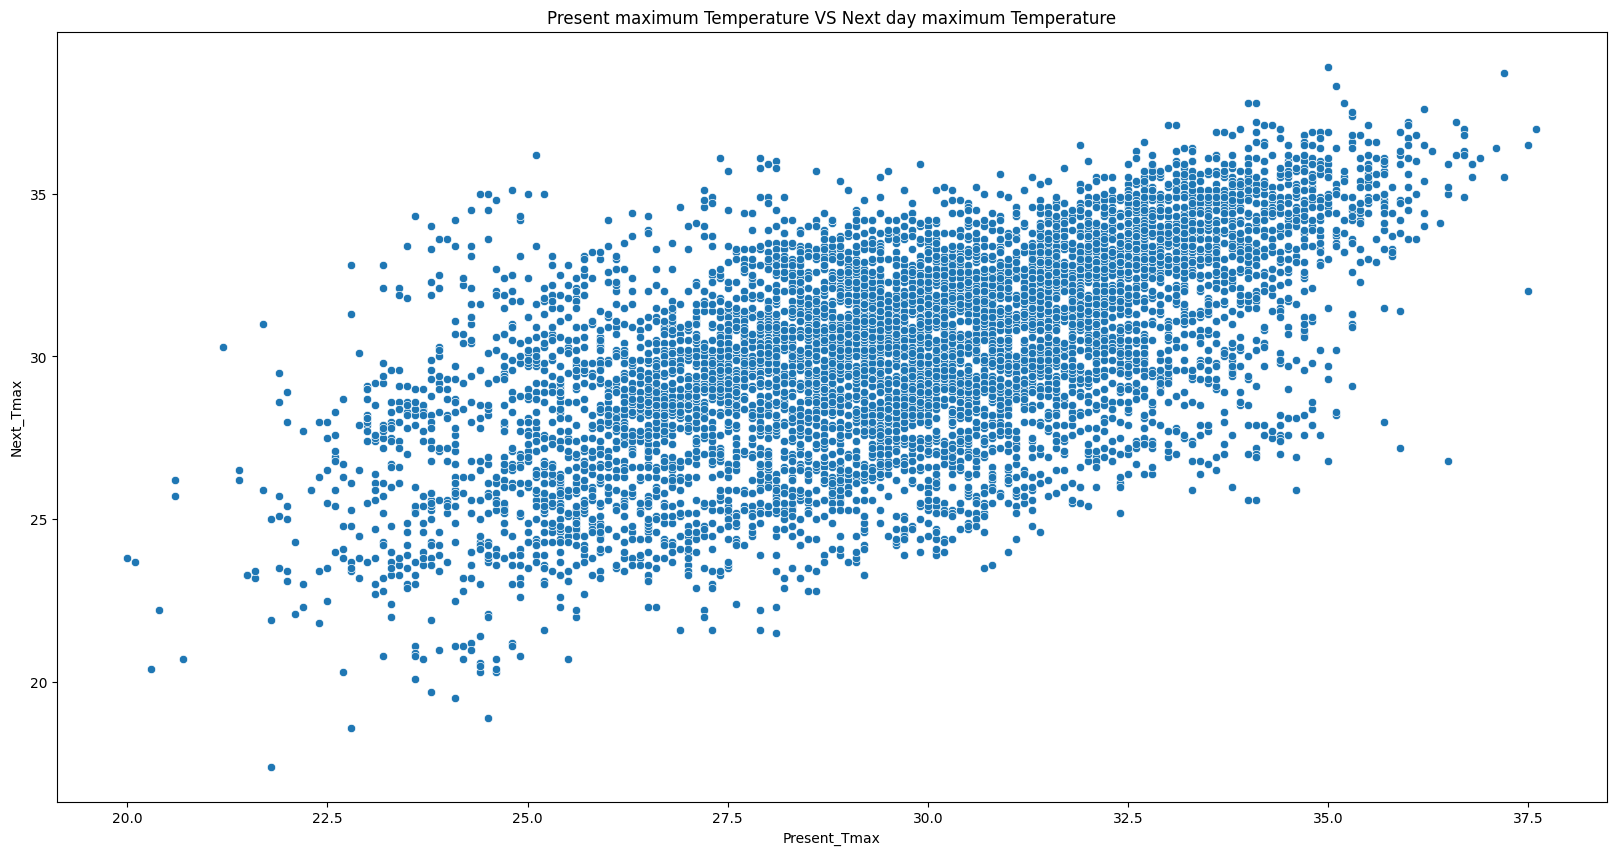

In [75]:

plt.figure(figsize=(20,10))
plt.title('Present maximum Temperature VS Next day maximum Temperature')
sns.scatterplot(x=tempdf['Present_Tmax'],y= tempdf['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

<Axes: title={'center': 'Next day maximum Temperature'}, xlabel='Next_Tmax', ylabel='Density'>

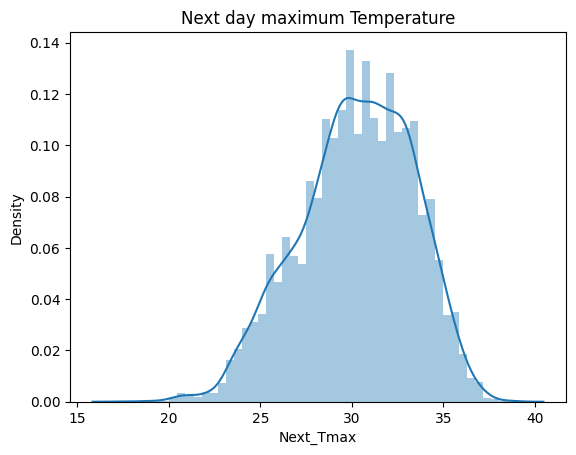

In [76]:
#Checking the distribution of data in Next_tmax feature 
plt.title('Next day maximum Temperature')
sns.distplot(tempdf['Next_Tmax'],kde=True)


<Axes: title={'center': 'Next day minimum Temperature'}, xlabel='Next_Tmin', ylabel='Density'>

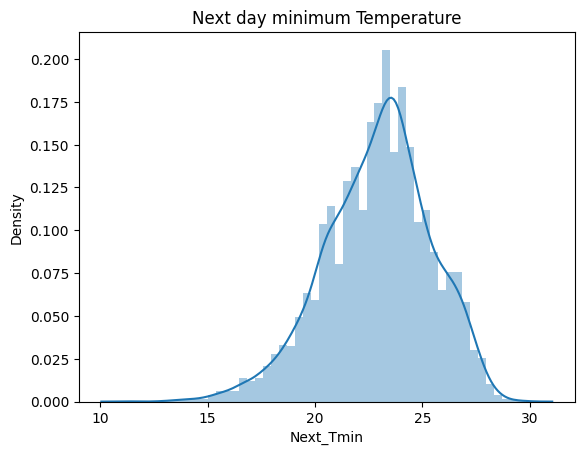

In [77]:
#Checking the distribution of data in Next_tmin feature 
plt.title('Next day minimum Temperature')
sns.distplot(tempdf['Next_Tmin'],kde=True)


In [71]:
# Here we observed that all the feature are in numeric form and we dont have any categorical feature is present in the dataframe 
# We have Date feature which we have converted from object type ro datetime format,now we have to peroform encoding on date feature .
# Here i have used ordinal Encoder to convert Date feature in numeric format
import datetime as dt
tempdf['Date']=tempdf['Date'].map(dt.datetime.toordinal)

In [72]:
tempdf

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,736571,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,736571,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,736571,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,736571,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [ ]:
                            LABELENCODER FOR CONVERTING CATEGORICAL DATA INTO NUMERICAL DATA

In [73]:
le=LabelEncoder()
for col in tempdf:
    if tempdf[col].dtypes=='object':
        tempdf[col]=le.fit_transfrom(tempdf[col])

In [74]:
tempdf

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,736571,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,736571,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,736571,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,736571,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [33]:
tempdf.head(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


                               CHECKING FOR OUTLIERS IN THE FEATURES

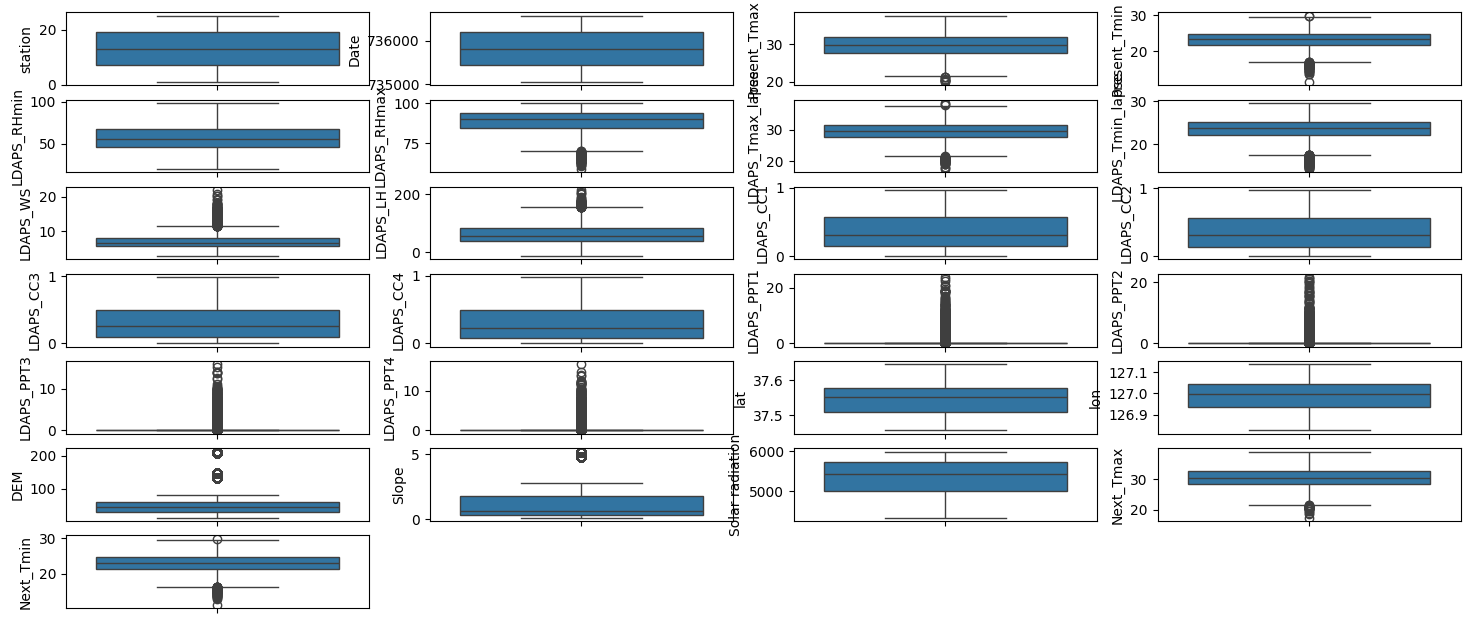

In [75]:
plt.figure(figsize=(18,10))
for col in enumerate(tempdf):
    plt.subplot(9,4,col[0]+1)
    sns.boxplot(tempdf[col[1]])
    

In [76]:
from scipy.stats import zscore 
z=np.abs(zscore(tempdf))
print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 8, 15, 15, ...,  3,  3,  7], dtype=int64))


In [77]:
tempdf_1=tempdf[(z<3).all(axis=1)]
print("with outliers::",tempdf.shape)
print("After removing outliers::",tempdf_1.shape)

with outliers:: (7588, 25)
After removing outliers:: (6739, 25)


In [78]:
tempdf=tempdf_1

                                CHECKING SKEWNESS IN THE FEATURES

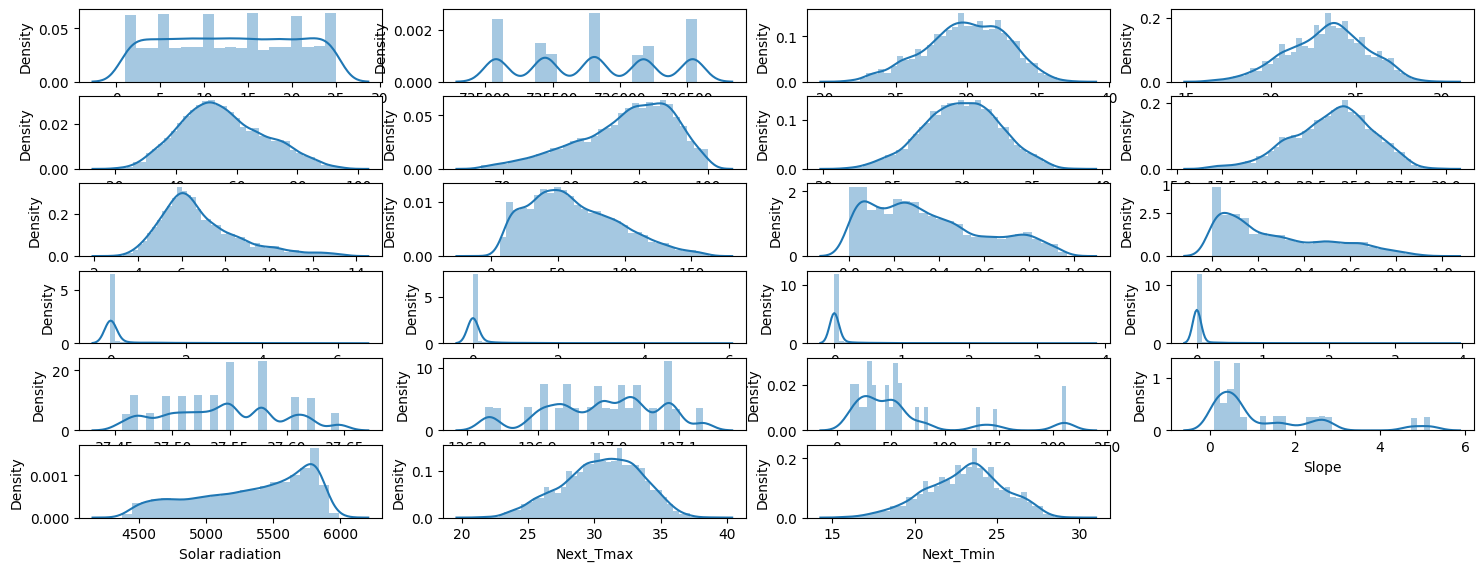

In [39]:
# Here enumerate weill store column along with their index in the list format
plt.figure(figsize=(18,10))
for col in enumerate(tempdf):
    plt.subplot(9,4,col[0]+1)# at 0 index of col store index of feature 
    sns.distplot(tempdf[col[1]])# at 1 index of col it store feature in each iterartion
    

In [79]:
tempdf.skew()

station            -0.001594
Date                0.025658
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

                                            REMOVING SKEWNESS FROM THE FEATURE

In [80]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
for col in tempdf:
    if abs(tempdf[col].skew())>0.5:
        tempdf.loc[:,col]=pt.fit_transform(tempdf.loc[:,col].values.reshape(-1,1))

In [81]:
tempdf.skew()

station            -0.001594
Date                0.025658
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.103320
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            0.007615
LDAPS_LH           -0.030736
LDAPS_CC1           0.065308
LDAPS_CC2           0.050023
LDAPS_CC3           0.094449
LDAPS_CC4           0.142061
LDAPS_PPT1          1.617538
LDAPS_PPT2          1.820237
LDAPS_PPT3          1.995359
LDAPS_PPT4          2.267954
lat                 0.106983
lon                -0.277547
DEM                 0.038830
Slope               0.233799
Solar radiation    -0.172156
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

In [82]:
y1 = tempdf["Next_Tmax"]
y2 = tempdf["Next_Tmin"]
x1 = tempdf.drop(["Next_Tmax","Next_Tmin"], axis=1)


In [44]:
x1

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,735049,28.7,21.4,58.255688,0.348222,28.074101,23.006936,0.176871,0.349992,...,-0.512476,-0.52537,-0.484794,-0.461889,-0.414444,37.6046,126.991,1.854393,1.327776,1.891687
1,2.0,735049,31.9,21.6,52.263397,0.261118,29.850689,24.035009,-0.574617,-0.166810,...,-0.532674,-0.52537,-0.484794,-0.461889,-0.414444,37.6046,127.032,0.069704,-0.375858,1.431077
2,3.0,735049,31.6,23.3,48.690479,-0.717348,30.091292,24.565633,-0.252083,-1.378337,...,-0.443077,-0.52537,-0.484794,-0.461889,-0.414444,37.5776,127.058,-0.353433,-0.944115,1.410511
3,4.0,735049,32.0,23.4,58.239788,1.375094,29.704629,23.326177,-0.606795,0.245926,...,-0.491694,-0.52537,-0.484794,-0.461889,-0.414444,37.6450,127.022,0.098766,1.249133,1.387059
4,5.0,735049,31.4,21.9,56.174095,0.186035,29.113934,23.486480,-0.541825,1.298111,...,-0.278264,-0.52537,-0.484794,-0.461889,-0.414444,37.5507,127.135,-0.278815,-0.392364,1.396254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,736571,23.1,17.8,24.688997,-1.363447,27.812697,18.303014,0.048293,-2.013062,...,-1.453999,-0.52537,-0.484794,-0.461889,-0.414444,37.5507,127.040,-0.712912,-0.269357,-1.763704
7746,22.0,736571,22.5,17.4,30.094858,-0.753410,26.704905,17.814038,-0.516916,0.685720,...,-1.339338,-0.52537,-0.484794,-0.461889,-0.414444,37.5102,127.086,-0.999559,-1.353609,-1.781247
7747,23.0,736571,23.3,17.1,26.741310,-1.302260,26.352081,18.775678,-0.244791,0.421213,...,-1.492710,-0.52537,-0.484794,-0.461889,-0.414444,37.5372,126.891,-1.576584,-1.278502,-1.779394
7748,24.0,736571,23.3,17.7,24.040634,-1.457152,27.010193,18.733519,0.011101,-0.319269,...,-1.492710,-0.52537,-0.484794,-0.461889,-0.414444,37.5237,126.909,-1.397502,-1.069018,-1.785446


In [45]:
y1

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 6739, dtype: float64

In [46]:
y2

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 6739, dtype: float64

                                PERFROMING SCALING OF THE INDEPENDENT FEATURES

In [83]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x1=pd.DataFrame(sc.fit_transform(x1),columns=x1.columns)

In [84]:
x1

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,0.000000,0.0,0.457317,0.384058,0.503580,0.586593,0.405939,0.493730,0.650058,0.787477,...,0.284589,0.0,0.0,0.0,0.0,0.786017,0.533981,1.000000,0.868307,1.000000
1,0.041667,0.0,0.652439,0.398551,0.425122,0.566825,0.510782,0.572443,0.533759,0.734006,...,0.278725,0.0,0.0,0.0,0.0,0.786017,0.666667,0.535462,0.340936,0.877378
2,0.083333,0.0,0.634146,0.521739,0.378341,0.344769,0.524981,0.613070,0.583674,0.608654,...,0.304737,0.0,0.0,0.0,0.0,0.643008,0.750809,0.425323,0.165028,0.871903
3,0.125000,0.0,0.658537,0.528986,0.503372,0.819633,0.502163,0.518173,0.528779,0.776710,...,0.290622,0.0,0.0,0.0,0.0,1.000000,0.634304,0.543026,0.843962,0.865660
4,0.166667,0.0,0.621951,0.420290,0.476325,0.549785,0.467303,0.530446,0.538834,0.885575,...,0.352587,0.0,0.0,0.0,0.0,0.500530,1.000000,0.444745,0.335826,0.868107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,0.833333,1.0,0.115854,0.123188,0.064083,0.198142,0.390512,0.133581,0.630159,0.542982,...,0.011239,0.0,0.0,0.0,0.0,0.500530,0.692557,0.331754,0.373904,0.026872
6735,0.875000,1.0,0.079268,0.094203,0.134863,0.336585,0.325137,0.096143,0.542689,0.822213,...,0.044528,0.0,0.0,0.0,0.0,0.286017,0.841424,0.257142,0.038267,0.022202
6736,0.916667,1.0,0.128049,0.072464,0.090954,0.212028,0.304315,0.169770,0.584802,0.794846,...,0.000000,0.0,0.0,0.0,0.0,0.429025,0.210356,0.106948,0.061516,0.022695
6737,0.958333,1.0,0.128049,0.115942,0.055594,0.176877,0.343153,0.166542,0.624403,0.718231,...,0.000000,0.0,0.0,0.0,0.0,0.357521,0.268608,0.153561,0.126364,0.021084


In [ ]:
                            CHECKING FOR MULTI COLLINEARITY IN THE FEATURES 

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['features']=x1.columns
vif

,vif values,features
0,4.474729,station
1,3.605596,Date
2,28.344226,Present_Tmax
3,33.310248,Present_Tmin
4,43.704586,LDAPS_RHmin
5,15.522769,LDAPS_RHmax
6,60.975358,LDAPS_Tmax_lapse
7,76.724823,LDAPS_Tmin_lapse
8,17.782938,LDAPS_WS
9,52.052325,LDAPS_LH


In [86]:
x1.drop(['LDAPS_Tmin_lapse'],axis=1,inplace=True)

In [87]:
vif1=pd.DataFrame()
vif1['vif values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif1['features']=x1.columns
vif1

,vif values,features
0,4.463756,station
1,3.574784,Date
2,25.733165,Present_Tmax
3,29.157933,Present_Tmin
4,30.458245,LDAPS_RHmin
5,15.182811,LDAPS_RHmax
6,27.608646,LDAPS_Tmax_lapse
7,17.737010,LDAPS_WS
8,43.735904,LDAPS_LH
9,16.574083,LDAPS_CC1


In [88]:
x1.drop(['LDAPS_LH'],axis=1,inplace=True)

In [89]:
vif2=pd.DataFrame()
vif2['vif values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif2['features']=x1.columns
vif2

,vif values,features
0,4.373255,station
1,3.424144,Date
2,22.916647,Present_Tmax
3,28.300657,Present_Tmin
4,29.852678,LDAPS_RHmin
5,12.148698,LDAPS_RHmax
6,25.837942,LDAPS_Tmax_lapse
7,15.951935,LDAPS_WS
8,16.322594,LDAPS_CC1
9,18.067664,LDAPS_CC2


In [ ]:
                    APPLYING PRINCIPAL COMPONENT ANALYSIS APPROACH

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X1_pca = pca.fit_transform(x1)


                            CREATING A MODEL WITH Next_Tmax AS TARGET FEATURE

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost 
from xgboost import XGBRegressor

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y1_train,y1_test = train_test_split(x1,y1,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y1_train)
    predrf = LR.predict(x_test)
    score = r2_score(y1_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.7756578820856292  on Random_state  108


In [92]:
lr=LinearRegression()
rg=Ridge()
etc=ExtraTreesRegressor()
gbr=GradientBoostingRegressor()
rfr=RandomForestRegressor()
knr=KNeighborsRegressor(n_neighbors=2)
svr=SVR(kernel='rbf')

In [93]:
x_train,x_test,y1_train,y1_test = train_test_split(x1,y1,test_size=.30,random_state=maxRS)

In [94]:
def regressor_models(model,x_train,y1_tain,x_test,y1_test):
    model.fit(x_train,y1_train)
    pred_test=model.predict(x_test)

    pred_train=model.predict(x_train)
    print('R2_score',r2_score(y1_test,pred_test)*100)
    print('R2 score on training data',r2_score(y1_train,pred_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y1_test,pred_test))
    print('Mean Squared  Error',mean_squared_error(y1_test,pred_test))
    print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y1_test,pred_test)))

    

In [95]:
models=[lr,rg,etc,gbr,rfr,knr,svr]


for model in models:
    print('Score for {}'.format(model))
    regressor_models(model,x_train,y1_train,x_test,y1_test)
    print('*'*50)

Score for LinearRegression()
R2_score 77.56578820856292
R2 score on training data 74.70339107254375
Mean Absolute Error 1.0840694103696251
Mean Squared  Error 1.9786664533437306
Root Mean Absolute Error 1.4066507929631045
**************************************************
Score for Ridge()
R2_score 77.56286075123467
R2 score on training data 74.69615126777107
Mean Absolute Error 1.0841192631545822
Mean Squared  Error 1.97892465103139
Root Mean Absolute Error 1.406742567434209
**************************************************
Score for ExtraTreesRegressor()
R2_score 91.62458972658273
R2 score on training data 100.0
Mean Absolute Error 0.6420054401582592
Mean Squared  Error 0.7386996028684468
Root Mean Absolute Error 0.8594763538739427
**************************************************
Score for GradientBoostingRegressor()
R2_score 85.63138326818188
R2 score on training data 87.3878379344442
Mean Absolute Error 0.873149085305474
Mean Squared  Error 1.267292123855837
Root Mean Absolute E

In [96]:
def cross_validation(model,x1,y1):
    pred_test=model.predict(x_test)
    score=cross_val_score(model,x1,y1,scoring='r2')
    print(score)
    print(score.mean())
    print('difference between r2 score and cross validation score is ',(r2_score(y1_test,pred_test)-score.mean())*100)

In [97]:
models=[lr,rg,etc,gbr,rfr,knr,svr]

In [98]:
for model in models:
    print('Cross validation for {}'.format(model))
    cross_validation(model,x1,y1)
    print('*'*50)

Cross validation for LinearRegression()
[0.68252913 0.65835453 0.67676932 0.73044021 0.5030004 ]
0.6502187182402382
difference between r2 score and cross validation score is  12.5439163845391
**************************************************
Cross validation for Ridge()
[0.68824261 0.65644958 0.67658158 0.73121317 0.50652093]
0.6518015724496491
difference between r2 score and cross validation score is  12.382703506269754
**************************************************
Cross validation for ExtraTreesRegressor()
[0.74867148 0.63022363 0.67732915 0.7115092  0.54801708]
0.663150106436688
difference between r2 score and cross validation score is  25.309579082913924
**************************************************
Cross validation for GradientBoostingRegressor()
[0.71755612 0.70681972 0.70046367 0.76257974 0.547866  ]
0.6870570506076652
difference between r2 score and cross validation score is  16.925678207415352
**************************************************
Cross validation for R

                    Hyper Parameter Tuning with Ridge for Next_Tmax

In [99]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_iter' :[0,10,20],
              'random_state':[15,16,17],
              'solver' : [ 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
rd=Ridge()

grid_search= GridSearchCV(Ridge(), parameters, cv=5)
grid_search.fit(x_train, y1_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'max_iter': [0, 10, 20], 'random_state': [15, 16, 17],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [100]:
grid_search.best_params_  #Best parameters

{'max_iter': 10, 'random_state': 15, 'solver': 'sag'}

In [101]:
grid_pred=grid_search.best_estimator_.predict(x_test)

In [102]:
r2_score(y1_test, grid_pred)

0.7750962357630907

In [103]:
final_model_regressor=Ridge(max_iter=10,random_state=16,solver='sag')
final_model_regressor.fit(x_train,y1_train)
pred=final_model_regressor.predict(x_test)
acc=r2_score(y1_test,pred)
print(acc)
score=cross_val_score(final_model_regressor,x1,y1,cv=5)
print(score)
print(score.mean()*100)
print('difference between r2 score and cross validation score is ',(acc-score.mean())*100)


0.7746002997330996
[0.68703778 0.6583794  0.67349429 0.73163334 0.50145288]
65.03995384368629
difference between r2 score and cross validation score is  12.42007612962367


In [105]:
import joblib

In [106]:
joblib.dump(final_model_regressor,'Temperature_Forecaste.pkl')

['Temperature_Forecaste.pkl']

In [107]:
model_regressor=joblib.load('Temperature_Forecaste.pkl')

In [108]:
df=pd.DataFrame()
prediction=model_regressor.predict(x_test)

In [109]:
dummy_test=np.array(y1_test)

In [110]:
df['orginal']=dummy_test
df['prediction']=prediction
df

,orginal,prediction
0,32.0,31.146659
1,30.1,30.622615
2,27.8,29.287791
3,27.6,25.946819
4,29.8,29.555580
...,...,...
2017,30.2,31.583518
2018,31.6,30.746746
2019,25.7,26.971501
2020,35.1,30.896713


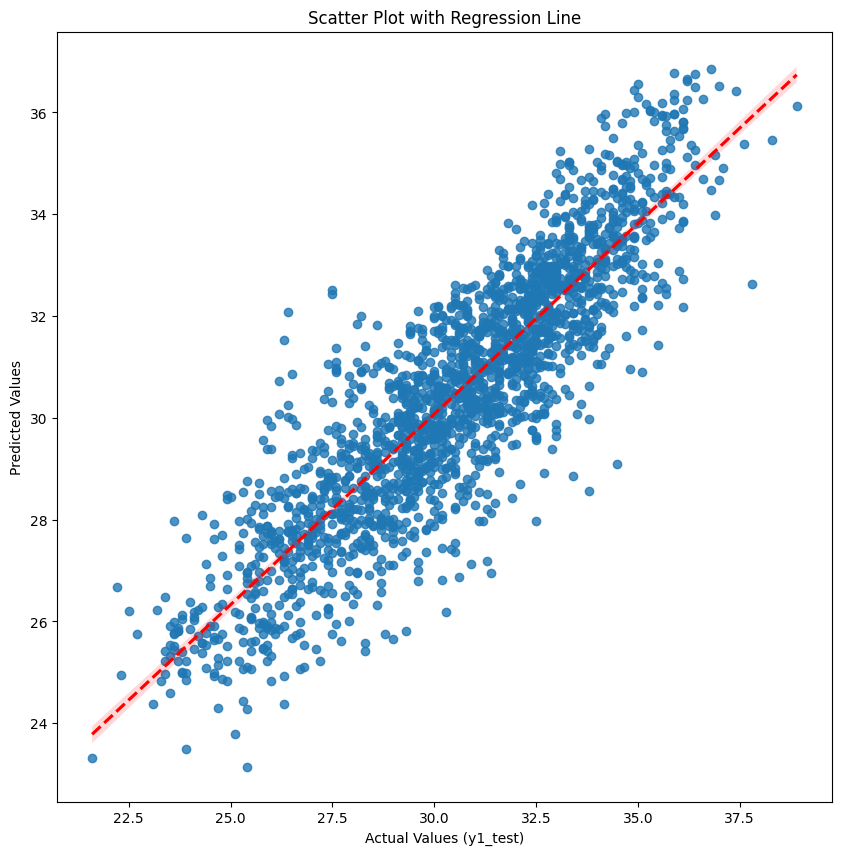

In [112]:
plt.figure(figsize=(10,10))
sns.regplot(x=y1_test, y=prediction ,line_kws={"color": "red", "linestyle": "--"})
plt.xlabel("Actual Values (y1_test)")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot with Regression Line")
plt.show()

                    CREATING A MODEL WITH Next_Tmin AS TARGET FEATURE

In [119]:
maxR2_Score=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y2_train,y2_test = train_test_split(x1,y2,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y2_train)
    predrf = LR.predict(x_test)
    score = r2_score(y2_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.7950947047851068  on Random_state  176


In [120]:
x_train,x_test,y2_train,y2_test = train_test_split(x1,y2,test_size=.30,random_state=maxRS)

In [121]:
lr=LinearRegression()
rg=Ridge()
etc=ExtraTreesRegressor()
gbr=GradientBoostingRegressor()
rfr=RandomForestRegressor()
knr=KNeighborsRegressor(n_neighbors=2)
svr=SVR(kernel='rbf')

In [122]:
def regressor_models(model,x_train,y2_tain,x_test,y2_test):
    model.fit(x_train,y2_train)
    pred_test=model.predict(x_test)

    pred_train=model.predict(x_train)
    print('R2_score',r2_score(y2_test,pred_test)*100)
    print('R2 score on training data',r2_score(y2_train,pred_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y2_test,pred_test))
    print('Mean Squared  Error',mean_squared_error(y2_test,pred_test))
    print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y2_test,pred_test)))

    

In [123]:
models=[lr,rg,etc,gbr,rfr,knr,svr]


for model in models:
    print('Score for {}'.format(model))
    regressor_models(model,x_train,y2_train,x_test,y2_test)
    print('*'*50)

Score for LinearRegression()
R2_score 79.50947047851068
R2 score on training data 77.23815227798568
Mean Absolute Error 0.8647548511222342
Mean Squared  Error 1.1907651407713402
Root Mean Absolute Error 1.0912218568060943
**************************************************
Score for Ridge()
R2_score 79.5083879912208
R2 score on training data 77.23060582002961
Mean Absolute Error 0.8646519642948816
Mean Squared  Error 1.1908280473023196
Root Mean Absolute Error 1.0912506803215838
**************************************************
Score for ExtraTreesRegressor()
R2_score 90.94107880184379
R2 score on training data 100.0
Mean Absolute Error 0.5463699307616222
Mean Squared  Error 0.5264406449060339
Root Mean Absolute Error 0.7255622956755912
**************************************************
Score for GradientBoostingRegressor()
R2_score 85.74338424474432
R2 score on training data 87.18324415759233
Mean Absolute Error 0.7172903175112793
Mean Squared  Error 0.8284940147069493
Root Mean Absol

In [124]:
def cross_validation(model,x1,y2):
    pred_test=model.predict(x_test)
    score=cross_val_score(model,x1,y2,scoring='r2')
    print(score)
    print(score.mean())
    print('difference between r2 score and cross validation score is ',(r2_score(y2_test,pred_test)-score.mean())*100)

In [ ]:
models=[lr,rg,etc,gbr,rfr,knr,svr]

In [125]:
for model in models:
    print('Cross validation for {}'.format(model))
    cross_validation(model,x1,y2)
    print('*'*50)

Cross validation for LinearRegression()
[0.62318499 0.6306743  0.71108737 0.82179288 0.78065947]
0.7134798014242978
difference between r2 score and cross validation score is  8.1614903360809
**************************************************
Cross validation for Ridge()
[0.62150338 0.62958458 0.71194122 0.8209943  0.78446671]
0.7136980367248957
difference between r2 score and cross validation score is  8.138584318731223
**************************************************
Cross validation for ExtraTreesRegressor()
[0.49282462 0.53291006 0.67234297 0.7995035  0.78523959]
0.6565641491043448
difference between r2 score and cross validation score is  25.28466389140931
**************************************************
Cross validation for GradientBoostingRegressor()
[0.53835818 0.58635204 0.69004538 0.79727194 0.67885857]
0.6581772212282988
difference between r2 score and cross validation score is  19.925662121914435
**************************************************
Cross validation for Ran

In [126]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_iter' :[0,10,20],
              'random_state':[15,16,17],
              'solver' : [ 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
rd=Ridge()

grid_search= GridSearchCV(Ridge(), parameters, cv=5)
grid_search.fit(x_train, y2_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'max_iter': [0, 10, 20], 'random_state': [15, 16, 17],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [127]:
grid_search.best_params_  #Best parameters

{'max_iter': 10, 'random_state': 15, 'solver': 'saga'}

In [128]:
final_model_regressor1=Ridge(max_iter=10,random_state=15,solver='saga')
final_model_regressor1.fit(x_train,y2_train)
pred=final_model_regressor1.predict(x_test)
acc=r2_score(y2_test,pred)
print(acc)
score=cross_val_score(final_model_regressor1,x1,y2,cv=5)
print(score)
print(score.mean()*100)
print('difference between r2 score and cross validation score is ',(acc-score.mean())*100)


0.7950678088074155
[0.62153248 0.62959045 0.7119483  0.82093376 0.78469719]
71.37404348478091
difference between r2 score and cross validation score is  8.132737395960632


In [129]:
joblib.dump(final_model_regressor1,'Temperature_Forecaste_Next_Tmin.pkl')

['Temperature_Forecaste_Next_Tmin.pkl']

In [131]:
model_regressor1=joblib.load('Temperature_Forecaste_Next_Tmin.pkl')

In [132]:
df=pd.DataFrame()
prediction=model_regressor1.predict(x_test)

In [130]:
dummy_test=np.array(y2_test)

In [133]:
df['orginal']=dummy_test
df['prediction']=prediction
df

,orginal,prediction
0,26.3,27.193572
1,23.0,22.000816
2,25.4,25.894106
3,24.6,25.250821
4,15.5,18.672175
...,...,...
2017,23.2,22.797945
2018,21.7,22.719269
2019,22.8,23.478012
2020,22.5,23.865381


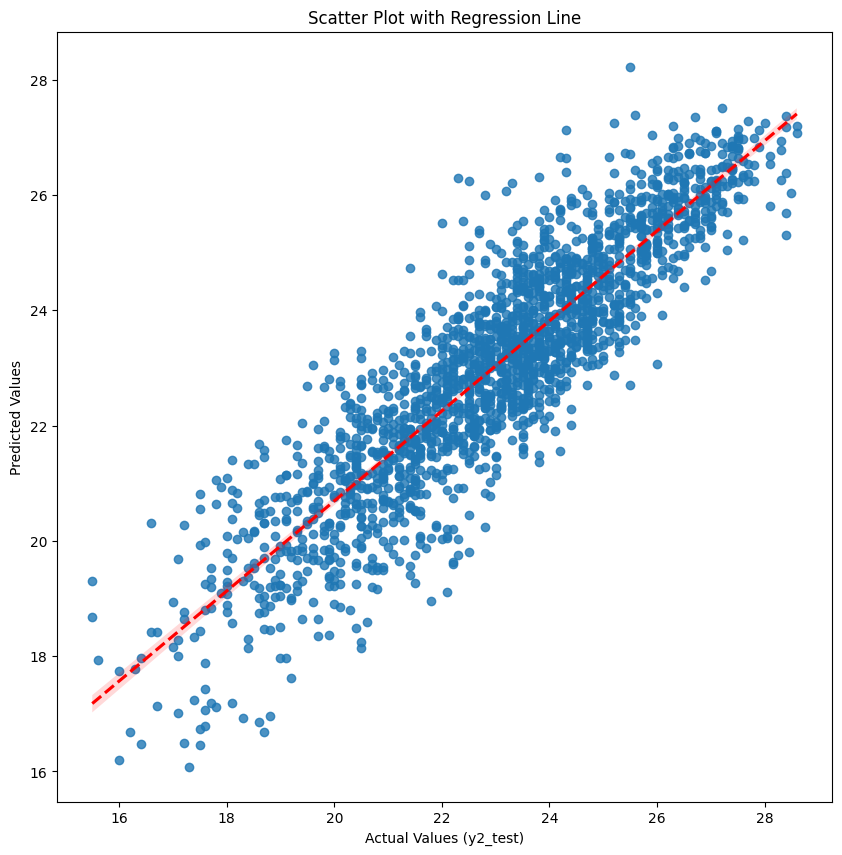

In [136]:
plt.figure(figsize=(10,10))
sns.regplot(x=y2_test, y=prediction ,line_kws={"color": "red", "linestyle": "--"})
plt.xlabel("Actual Values (y2_test)")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot with Regression Line")
plt.show()